In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("healthcare-dataset-stroke-data.csv")

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
df=df.drop("id",axis=1)

# Gathering some information about dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [8]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [9]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [11]:
df=df.dropna()

In [13]:
df.shape

(4909, 11)

# Gathering more spacific information about inside of dataset

what is the proportion of men to women who have strokes

<AxesSubplot:xlabel='gender', ylabel='count'>

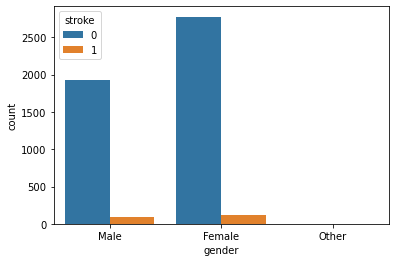

In [24]:
sns.countplot(x=df["gender"],hue=df["stroke"])

In [17]:
df["gender"].value_counts()

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64

What is the distribution of age

<AxesSubplot:xlabel='age', ylabel='Count'>

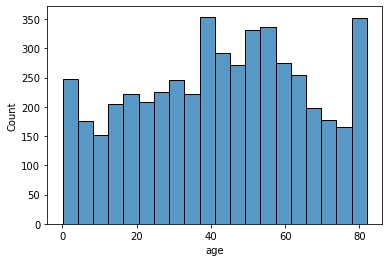

In [18]:
sns.histplot(x=df["age"])

What are the ages which men and women are struggling with stroke

<AxesSubplot:xlabel='heart_disease', ylabel='age'>

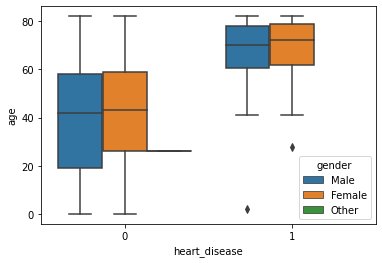

In [20]:
sns.boxplot(data=df,x="heart_disease",y="age",hue="gender")

Does residance type have any effect on them?

<AxesSubplot:xlabel='stroke', ylabel='count'>

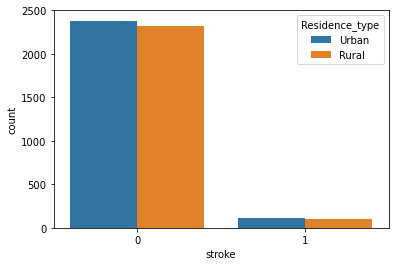

In [27]:
sns.countplot(data=df,x="stroke",hue="Residence_type")

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Count'>

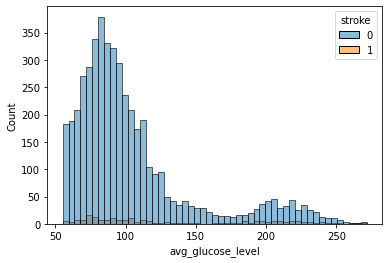

In [33]:
sns.histplot(data=df,x="avg_glucose_level",hue="stroke")

<AxesSubplot:xlabel='bmi', ylabel='Count'>

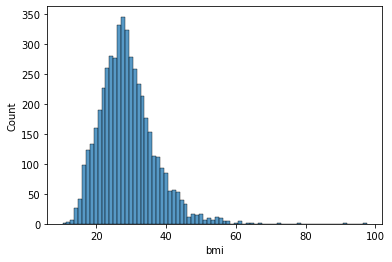

In [34]:
sns.histplot(data=df,x="bmi")

# Replacing numeric with non numeric

In [50]:
frame=[]
frame=pd.get_dummies(df["gender"])

In [53]:
frame=frame.drop(["Other","Female"],axis=1)
df["gender"]=frame

In [56]:
frame=[]
frame=pd.get_dummies(df["ever_married"],drop_first=True)

In [62]:
frame=frame.rename(columns={"Yes":"ever_married"})
df["ever_married"]=frame

In [63]:
frame=[]
frame=pd.get_dummies(df["work_type"],drop_first=True)

In [66]:
df=pd.concat([frame,df],axis=1)

In [67]:
df=df.drop(["work_type"],axis=1)

In [ ]:
'Residence_type'

In [68]:
frame=[]
frame=pd.get_dummies(df['Residence_type'],drop_first=True)

In [70]:
df['Residence_type']=frame
df=df.rename(columns={'Residence_type':"Urban"})

In [72]:
frame=[]
frame=pd.get_dummies(df['smoking_status'],drop_first=True)

In [74]:
df=pd.concat([frame,df],axis=1)

In [75]:
df=df.drop("smoking_status",axis=1)

# Final DataFrame

In [76]:
df.head()

,formerly smoked,never smoked,smokes,Never_worked,Private,Self-employed,children,gender,age,hypertension,heart_disease,ever_married,Urban,avg_glucose_level,bmi,stroke
0,1,0,0,0,1,0,0,1,67.0,0,1,1,1,228.69,36.6,1
2,0,1,0,0,1,0,0,1,80.0,0,1,1,0,105.92,32.5,1
3,0,0,1,0,1,0,0,0,49.0,0,0,1,1,171.23,34.4,1
4,0,1,0,0,0,1,0,0,79.0,1,0,1,0,174.12,24.0,1
5,1,0,0,0,1,0,0,1,81.0,0,0,1,1,186.21,29.0,1


# Creating our keras model

In [83]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [79]:
x=df.drop("stroke",axis=1)
y=df["stroke"]

In [80]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y)

In [85]:
mms=MinMaxScaler()

In [86]:
xtrain=mms.fit_transform(xtrain)
xtest=mms.fit_transform(xtest)

In [82]:
xtrain.shape

(3681, 15)

In [87]:
model= Sequential()
model.add(Dense(15,activation="relu"))
model.add(Dense(10,activation="relu"))
model.add(Dense(5,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.compile(loss="binary_crossentropy",optimizer="adam")

In [88]:
model.fit(xtrain,ytrain,epochs=600,validation_data=(xtest,ytest))

Epoch 1/600
116/116 [==============================] - 1s 3ms/step - loss: 0.7372 - val_loss: 0.6017
Epoch 2/600
116/116 [==============================] - 0s 2ms/step - loss: 0.4126 - val_loss: 0.2207
Epoch 3/600
116/116 [==============================] - 0s 2ms/step - loss: 0.2013 - val_loss: 0.1973
Epoch 4/600
116/116 [==============================] - 0s 2ms/step - loss: 0.1886 - val_loss: 0.1891
Epoch 5/600
116/116 [==============================] - 0s 2ms/step - loss: 0.1809 - val_loss: 0.1822
Epoch 6/600
116/116 [==============================] - 0s 2ms/step - loss: 0.1745 - val_loss: 0.1768
Epoch 7/600
116/116 [==============================] - 0s 2ms/step - loss: 0.1691 - val_loss: 0.1724
Epoch 8/600
116/116 [==============================] - 0s 2ms/step - loss: 0.1651 - val_loss: 0.1679
Epoch 9/600
116/116 [==============================] - 0s 2ms/step - loss: 0.1612 - val_loss: 0.1634
Epoch 10/600
116/116 [==============================] - 0s 2ms/step - loss: 0.1585 - val_lo

116/116 [==============================] - 0s 2ms/step - loss: 0.1277 - val_loss: 0.1511
Epoch 82/600
116/116 [==============================] - 0s 2ms/step - loss: 0.1269 - val_loss: 0.1493
Epoch 83/600
116/116 [==============================] - 0s 2ms/step - loss: 0.1264 - val_loss: 0.1494
Epoch 84/600
116/116 [==============================] - 0s 2ms/step - loss: 0.1258 - val_loss: 0.1485
Epoch 85/600
116/116 [==============================] - 0s 2ms/step - loss: 0.1257 - val_loss: 0.1501
Epoch 86/600
116/116 [==============================] - 0s 2ms/step - loss: 0.1256 - val_loss: 0.1515
Epoch 87/600
116/116 [==============================] - 0s 2ms/step - loss: 0.1257 - val_loss: 0.1504
Epoch 88/600
116/116 [==============================] - 0s 1ms/step - loss: 0.1249 - val_loss: 0.1512
Epoch 89/600
116/116 [==============================] - 0s 2ms/step - loss: 0.1256 - val_loss: 0.1536
Epoch 90/600
116/116 [==============================] - 0s 1ms/step - loss: 0.1255 - val_loss: 

Epoch 161/600
116/116 [==============================] - 0s 2ms/step - loss: 0.1167 - val_loss: 0.1612
Epoch 162/600
116/116 [==============================] - 0s 2ms/step - loss: 0.1171 - val_loss: 0.1613
Epoch 163/600
116/116 [==============================] - 0s 1ms/step - loss: 0.1174 - val_loss: 0.1603
Epoch 164/600
116/116 [==============================] - 0s 2ms/step - loss: 0.1168 - val_loss: 0.1598
Epoch 165/600
116/116 [==============================] - 0s 1ms/step - loss: 0.1152 - val_loss: 0.1627
Epoch 166/600
116/116 [==============================] - 0s 2ms/step - loss: 0.1164 - val_loss: 0.1609
Epoch 167/600
116/116 [==============================] - 0s 2ms/step - loss: 0.1170 - val_loss: 0.1581
Epoch 168/600
116/116 [==============================] - 0s 1ms/step - loss: 0.1164 - val_loss: 0.1592
Epoch 169/600
116/116 [==============================] - 0s 2ms/step - loss: 0.1161 - val_loss: 0.1604
Epoch 170/600
116/116 [==============================] - 0s 1ms/step - lo

116/116 [==============================] - 0s 2ms/step - loss: 0.1109 - val_loss: 0.1726
Epoch 241/600
116/116 [==============================] - 0s 1ms/step - loss: 0.1131 - val_loss: 0.1761
Epoch 242/600
116/116 [==============================] - 0s 1ms/step - loss: 0.1109 - val_loss: 0.1729
Epoch 243/600
116/116 [==============================] - 0s 2ms/step - loss: 0.1096 - val_loss: 0.1744
Epoch 244/600
116/116 [==============================] - 0s 1ms/step - loss: 0.1106 - val_loss: 0.1708
Epoch 245/600
116/116 [==============================] - 0s 2ms/step - loss: 0.1104 - val_loss: 0.1729
Epoch 246/600
116/116 [==============================] - 0s 1ms/step - loss: 0.1095 - val_loss: 0.1729
Epoch 247/600
116/116 [==============================] - 0s 2ms/step - loss: 0.1103 - val_loss: 0.1737
Epoch 248/600
116/116 [==============================] - 0s 1ms/step - loss: 0.1112 - val_loss: 0.1724
Epoch 249/600
116/116 [==============================] - 0s 1ms/step - loss: 0.1105 - v

116/116 [==============================] - 0s 2ms/step - loss: 0.1058 - val_loss: 0.1961
Epoch 320/600
116/116 [==============================] - 0s 1ms/step - loss: 0.1071 - val_loss: 0.1830
Epoch 321/600
116/116 [==============================] - 0s 2ms/step - loss: 0.1063 - val_loss: 0.1850
Epoch 322/600
116/116 [==============================] - 0s 2ms/step - loss: 0.1060 - val_loss: 0.1769
Epoch 323/600
116/116 [==============================] - 0s 1ms/step - loss: 0.1074 - val_loss: 0.1819
Epoch 324/600
116/116 [==============================] - 0s 1ms/step - loss: 0.1060 - val_loss: 0.1836
Epoch 325/600
116/116 [==============================] - 0s 1ms/step - loss: 0.1042 - val_loss: 0.1913
Epoch 326/600
116/116 [==============================] - 0s 2ms/step - loss: 0.1059 - val_loss: 0.1861
Epoch 327/600
116/116 [==============================] - 0s 2ms/step - loss: 0.1061 - val_loss: 0.1875
Epoch 328/600
116/116 [==============================] - 0s 1ms/step - loss: 0.1040 - v

116/116 [==============================] - 0s 2ms/step - loss: 0.1001 - val_loss: 0.2138
Epoch 399/600
116/116 [==============================] - 0s 1ms/step - loss: 0.1009 - val_loss: 0.2106
Epoch 400/600
116/116 [==============================] - 0s 2ms/step - loss: 0.1004 - val_loss: 0.2077
Epoch 401/600
116/116 [==============================] - 0s 2ms/step - loss: 0.1005 - val_loss: 0.2136
Epoch 402/600
116/116 [==============================] - 0s 1ms/step - loss: 0.1014 - val_loss: 0.2108
Epoch 403/600
116/116 [==============================] - 0s 1ms/step - loss: 0.0999 - val_loss: 0.2106
Epoch 404/600
116/116 [==============================] - 0s 2ms/step - loss: 0.1013 - val_loss: 0.2165
Epoch 405/600
116/116 [==============================] - 0s 1ms/step - loss: 0.1091 - val_loss: 0.2055
Epoch 406/600
116/116 [==============================] - 0s 1ms/step - loss: 0.1012 - val_loss: 0.2143
Epoch 407/600
116/116 [==============================] - 0s 2ms/step - loss: 0.1035 - v

116/116 [==============================] - 0s 2ms/step - loss: 0.0955 - val_loss: 0.2301
Epoch 478/600
116/116 [==============================] - 0s 2ms/step - loss: 0.0964 - val_loss: 0.2436
Epoch 479/600
116/116 [==============================] - 0s 1ms/step - loss: 0.0985 - val_loss: 0.2329
Epoch 480/600
116/116 [==============================] - 0s 1ms/step - loss: 0.0977 - val_loss: 0.2338
Epoch 481/600
116/116 [==============================] - 0s 1ms/step - loss: 0.0988 - val_loss: 0.2305
Epoch 482/600
116/116 [==============================] - 0s 1ms/step - loss: 0.0960 - val_loss: 0.2412
Epoch 483/600
116/116 [==============================] - 0s 2ms/step - loss: 0.0967 - val_loss: 0.2337
Epoch 484/600
116/116 [==============================] - 0s 1ms/step - loss: 0.0956 - val_loss: 0.2306
Epoch 485/600
116/116 [==============================] - 0s 1ms/step - loss: 0.0963 - val_loss: 0.2428
Epoch 486/600
116/116 [==============================] - 0s 2ms/step - loss: 0.0957 - v

116/116 [==============================] - 0s 2ms/step - loss: 0.0919 - val_loss: 0.2646
Epoch 557/600
116/116 [==============================] - 0s 1ms/step - loss: 0.0941 - val_loss: 0.2617
Epoch 558/600
116/116 [==============================] - 0s 1ms/step - loss: 0.0925 - val_loss: 0.2848
Epoch 559/600
116/116 [==============================] - 0s 1ms/step - loss: 0.0918 - val_loss: 0.2683
Epoch 560/600
116/116 [==============================] - 0s 1ms/step - loss: 0.0943 - val_loss: 0.2781
Epoch 561/600
116/116 [==============================] - 0s 1ms/step - loss: 0.0927 - val_loss: 0.2771
Epoch 562/600
116/116 [==============================] - 0s 1ms/step - loss: 0.0929 - val_loss: 0.2682
Epoch 563/600
116/116 [==============================] - 0s 2ms/step - loss: 0.0984 - val_loss: 0.2634
Epoch 564/600
116/116 [==============================] - 0s 1ms/step - loss: 0.0956 - val_loss: 0.2818
Epoch 565/600
116/116 [==============================] - 0s 1ms/step - loss: 0.0923 - v

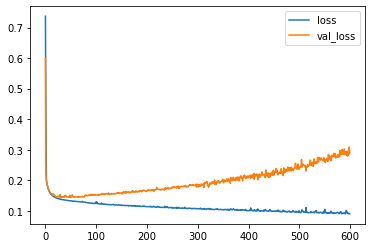

In [90]:
loss=pd.DataFrame(model.history.history).plot()

# We have over fitted our data let's repair it using early stopping

In [91]:
from tensorflow.keras.callbacks import EarlyStopping

In [94]:
early_stop=EarlyStopping(mode="min",patience=25)

In [98]:
model= Sequential()
model.add(Dense(15,activation="relu"))
model.add(Dense(10,activation="relu"))
model.add(Dense(5,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.compile(loss="binary_crossentropy",optimizer="adam")

In [99]:
model.fit(xtrain,ytrain,epochs=600,validation_data=(xtest,ytest),callbacks=[early_stop])

Epoch 1/600
116/116 [==============================] - 1s 3ms/step - loss: 0.3350 - val_loss: 0.2117
Epoch 2/600
116/116 [==============================] - 0s 2ms/step - loss: 0.1933 - val_loss: 0.1876
Epoch 3/600
116/116 [==============================] - 0s 2ms/step - loss: 0.1772 - val_loss: 0.1759
Epoch 4/600
116/116 [==============================] - 0s 2ms/step - loss: 0.1688 - val_loss: 0.1680
Epoch 5/600
116/116 [==============================] - 0s 2ms/step - loss: 0.1632 - val_loss: 0.1617
Epoch 6/600
116/116 [==============================] - 0s 2ms/step - loss: 0.1593 - val_loss: 0.1579
Epoch 7/600
116/116 [==============================] - 0s 2ms/step - loss: 0.1574 - val_loss: 0.1558
Epoch 8/600
116/116 [==============================] - 0s 2ms/step - loss: 0.1548 - val_loss: 0.1528
Epoch 9/600
116/116 [==============================] - 0s 2ms/step - loss: 0.1536 - val_loss: 0.1509
Epoch 10/600
116/116 [==============================] - 0s 2ms/step - loss: 0.1520 - val_lo

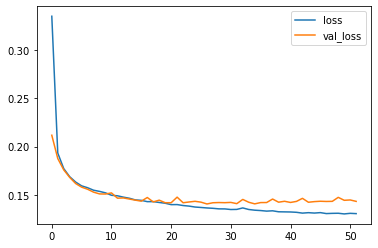

In [100]:
loss=pd.DataFrame(model.history.history).plot()

# Let's do test dropouts also to see the results

In [101]:
from tensorflow.keras.layers import Dropout

In [104]:
model= Sequential()
model.add(Dense(15,activation="relu"))
model.add(Dropout(.5))
model.add(Dense(10,activation="relu"))
model.add(Dropout(.5))
model.add(Dense(5,activation="relu"))
model.add(Dropout(.5))
model.add(Dense(1,activation="sigmoid"))
model.compile(loss="binary_crossentropy",optimizer="adam")

In [105]:
model.fit(xtrain,ytrain,epochs=600,validation_data=(xtest,ytest),callbacks=[early_stop])

Epoch 1/600
116/116 [==============================] - 1s 3ms/step - loss: 0.5612 - val_loss: 0.3591
Epoch 2/600
116/116 [==============================] - 0s 2ms/step - loss: 0.3988 - val_loss: 0.2273
Epoch 3/600
116/116 [==============================] - 0s 2ms/step - loss: 0.3348 - val_loss: 0.2013
Epoch 4/600
116/116 [==============================] - 0s 2ms/step - loss: 0.2976 - val_loss: 0.1903
Epoch 5/600
116/116 [==============================] - 0s 2ms/step - loss: 0.2622 - val_loss: 0.1827
Epoch 6/600
116/116 [==============================] - 0s 2ms/step - loss: 0.2548 - val_loss: 0.1768
Epoch 7/600
116/116 [==============================] - 0s 2ms/step - loss: 0.2533 - val_loss: 0.1731
Epoch 8/600
116/116 [==============================] - 0s 2ms/step - loss: 0.2346 - val_loss: 0.1703
Epoch 9/600
116/116 [==============================] - 0s 2ms/step - loss: 0.2228 - val_loss: 0.1687
Epoch 10/600
116/116 [==============================] - 0s 2ms/step - loss: 0.2180 - val_lo

116/116 [==============================] - 0s 2ms/step - loss: 0.1569 - val_loss: 0.1508
Epoch 82/600
116/116 [==============================] - 0s 2ms/step - loss: 0.1540 - val_loss: 0.1488
Epoch 83/600
116/116 [==============================] - 0s 2ms/step - loss: 0.1552 - val_loss: 0.1488
Epoch 84/600
116/116 [==============================] - 0s 2ms/step - loss: 0.1543 - val_loss: 0.1500
Epoch 85/600
116/116 [==============================] - 0s 2ms/step - loss: 0.1552 - val_loss: 0.1503
Epoch 86/600
116/116 [==============================] - 0s 2ms/step - loss: 0.1509 - val_loss: 0.1507
Epoch 87/600
116/116 [==============================] - 0s 2ms/step - loss: 0.1552 - val_loss: 0.1499
Epoch 88/600
116/116 [==============================] - 0s 2ms/step - loss: 0.1524 - val_loss: 0.1520
Epoch 89/600
116/116 [==============================] - 0s 2ms/step - loss: 0.1510 - val_loss: 0.1512
Epoch 90/600
116/116 [==============================] - 0s 2ms/step - loss: 0.1537 - val_loss: 

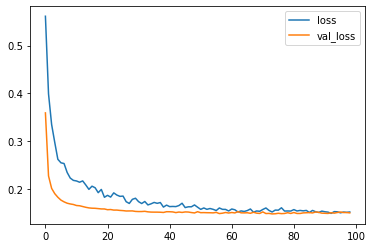

In [106]:
loss=pd.DataFrame(model.history.history).plot()

This is even better we could get really low gap between them

In [114]:
prediction=model.predict_classes(xtest)

In [119]:
from sklearn import metrics

In [120]:
metrics.confusion_matrix(ytest,prediction)

array([[1176,    0],
       [  52,    0]], dtype=int64)

In [122]:
print(metrics.classification_report(ytest,prediction))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1176
           1       0.00      0.00      0.00        52

    accuracy                           0.96      1228
   macro avg       0.48      0.50      0.49      1228
weighted avg       0.92      0.96      0.94      1228



C:\Users\mahyar_fardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mahyar_fardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mahyar_fardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


A 96 percent accuracy is good but lets see if we could increase it by increasing nodes

In [123]:
model= Sequential()
model.add(Dense(25,activation="relu"))
model.add(Dropout(.5))
model.add(Dense(20,activation="relu"))
model.add(Dropout(.5))
model.add(Dense(15,activation="relu"))
model.add(Dropout(.3))
model.add(Dense(10,activation="relu"))
model.add(Dropout(.3))
model.add(Dense(5,activation="relu"))
model.add(Dropout(.2))
model.add(Dense(1,activation="sigmoid"))
model.compile(loss="binary_crossentropy",optimizer="adam")

In [124]:
model.fit(xtrain,ytrain,epochs=600,validation_data=(xtest,ytest),callbacks=[early_stop])

Epoch 1/600
116/116 [==============================] - 1s 3ms/step - loss: 0.6572 - val_loss: 0.5090
Epoch 2/600
116/116 [==============================] - 0s 2ms/step - loss: 0.3601 - val_loss: 0.1848
Epoch 3/600
116/116 [==============================] - 0s 2ms/step - loss: 0.2630 - val_loss: 0.1715
Epoch 4/600
116/116 [==============================] - 0s 2ms/step - loss: 0.2369 - val_loss: 0.1687
Epoch 5/600
116/116 [==============================] - 0s 2ms/step - loss: 0.2155 - val_loss: 0.1632
Epoch 6/600
116/116 [==============================] - 0s 2ms/step - loss: 0.2115 - val_loss: 0.1604
Epoch 7/600
116/116 [==============================] - 0s 2ms/step - loss: 0.2054 - val_loss: 0.1583
Epoch 8/600
116/116 [==============================] - 0s 2ms/step - loss: 0.1952 - val_loss: 0.1581
Epoch 9/600
116/116 [==============================] - 0s 2ms/step - loss: 0.1904 - val_loss: 0.1568
Epoch 10/600
116/116 [==============================] - 0s 2ms/step - loss: 0.1911 - val_lo

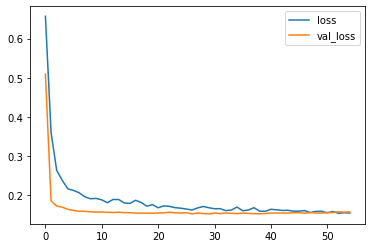

In [125]:
loss=pd.DataFrame(model.history.history).plot()

In [131]:
prediction1=model.predict_classes(xtest)

C:\Users\mahyar_fardin\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [132]:
print(metrics.classification_report(ytest,prediction1))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1176
           1       0.00      0.00      0.00        52

    accuracy                           0.96      1228
   macro avg       0.48      0.50      0.49      1228
weighted avg       0.92      0.96      0.94      1228



C:\Users\mahyar_fardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mahyar_fardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mahyar_fardin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


so nodes could not effect the model :)